Bryan Kim \
CISB 60 \
Final Project \
Comparing Deep Learning results versus Support Vector Machines (SVM) in Fraud Detection using a Wine Dataset

Wines are expensive. Some exploit this as a business opportunity to adulterate wines and sell them. Our dataset contains wine samples with chemical analyses done on them. This project explores machine learning and deep learning techniques to compare how well they are able to identify and distinguish between legit and fraudulent wines based on chemical composition. \
As we will see later, both SVM and deep learning/neural network models show poor performance as far as the task of fraud detection is concerned, but for different reasons. Our SVM model struggles with fraud detection due to low precision indicating a high number of false positives. And our deep learning model is overly cautious and misses the vast majority of actual fraudulent cases. \
If this dataset represented a restaurant's inventory of wines, and we wanted to be careful about falsely accusing their stock as being fraudulent wines, our cautious deep learning model could potentially be useful. However, if we were tasked with helping them identify the fake wines in their inventory, both models would fall short of the task at hand. 

**Dataset: wine_fraud.csv** \
The dataset includes the following columns: \
fixed acidity \
volatile acidity \
citric acid \
residual sugar \
chlorides \
free sulfur dioxide \
total suflur dioxide \
density \
pH \
sulphates \
alcohol \
type: The type of wine (red or white) \
quality: The classification of the wine (legit or fraud)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv("data/wine_fraud.csv")

In [5]:
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality type  
0      9.4   Legit  red  
1      9.8   Legit  red  
2      9

In [7]:
# The target labels we will use
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

In [9]:
df['type'].unique()

array(['red', 'white'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

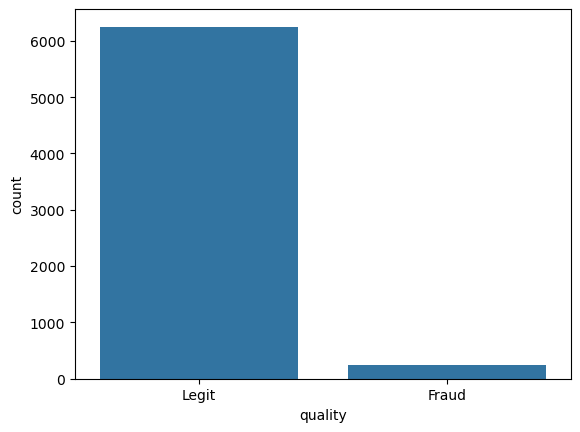

In [11]:
sns.countplot(df, x="quality")

In [ ]:
#Most of the wines in our dataset are Legit

<Axes: xlabel='quality', ylabel='percent'>

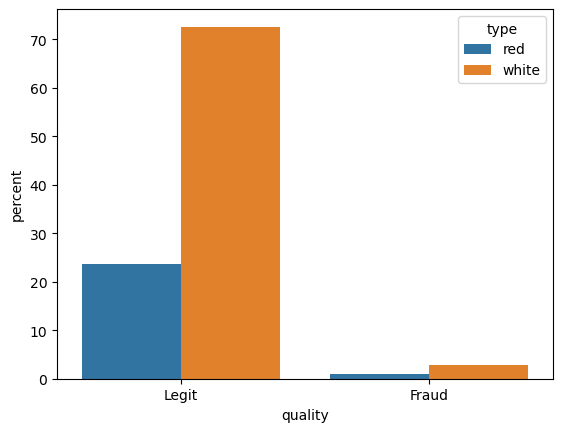

In [25]:
#Let's see what proportion of our legit and fraud wines are red or white
sns.countplot(df, x="quality", hue="type", stat="percent")

In [ ]:
#the majority of our legit wines are white, and similar for our fraudulent wines

<Axes: xlabel='type', ylabel='percent'>

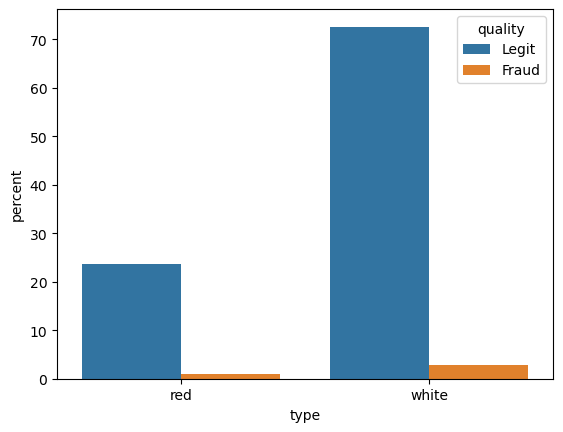

In [27]:
#Another way to visualize the distribution of our data
#Calculate the percentage of wines labeled as fraud for red and white wines
sns.countplot(df, x="type", hue="quality", stat="percent")

In [116]:
total_red_wines = len(df[df['type']=='red'])
fraud_red_wines = len(df[(df['type']=='red')&(df['quality']=='Fraud')])
percent_fraud_red_wines = fraud_red_wines/total_red_wines*100
print(f'Percentage of fraud in Red Wines: {percent_fraud_red_wines:.2f}')

Percentage of fraud in Red Wines: 3.94


In [118]:
total_white_wines = len(df[df['type']=='white'])
fraud_white_wines = len(df[(df['type']=='white')&(df['quality']=='Fraud')])
percent_fraud_white_wines = fraud_white_wines/total_white_wines*100
print(f'Percentage of fraud in White Wines: {percent_fraud_white_wines:.2f}')

Percentage of fraud in White Wines: 3.74


**Convert the 'Quality' column into a numeric variable for analysis.**

**Fraud=0**

**Legit=1**

In [30]:
label_encoder = LabelEncoder()

In [32]:
categorical_column = ['quality']

In [34]:
for column in categorical_column:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4        1  red  
1      9.8        1  red  
2    

**Converting the 'Type' column into dummy variables for analysis**

In [37]:
dummies=pd.get_dummies(df, columns=['type'], drop_first=True, dtype='int')
dummies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


**Split the dataset into Feature and Target variables**

In [48]:
#Drop the 'quality' column from X and assign the 'fraud' column to y
X = dummies.drop('quality', axis=1)
y = dummies['quality']

**Split the dataset into training and testing sets using an 80-20 split**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("\nTesting set size:", X_test.shape)


Training set size: (5197, 12)

Testing set size: (1300, 12)


**Scale the features in our training and test sets**

In [54]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
print(X_train)

[[-0.46822898 -0.59951186  0.20546655 ... -1.0832659   0.01376574
   0.56512866]
 [ 0.85149992 -0.35284877  1.10406349 ...  0.59857677  1.60871671
  -1.76950857]
 [ 0.38571325  2.32961232 -2.14471006 ...  0.26220824  1.10504798
  -1.76950857]
 ...
 [-0.62349121  0.20214318 -0.83137607 ... -0.67962366 -0.82568214
   0.56512866]
 [-0.54586009 -0.47618032  1.24230917 ... -0.41052883 -0.82568214
   0.56512866]
 [-0.00244231  1.74378748 -1.79909585 ...  0.06038712 -0.82568214
  -1.76950857]]


In [58]:
print(X_test)

[[-0.19881797 -1.03269521  2.89842878 ... -1.01918451  1.39911755
   0.59630422]
 [ 0.32850455  1.6721092  -0.6913277  ... -0.55058209 -0.52157659
  -1.67699634]
 [-0.34948155  0.23338345  0.1891786  ... -0.6175253   1.23210067
   0.59630422]
 ...
 [-0.50014513 -1.09024424  0.25690986 ...  1.45771398  1.56613443
   0.59630422]
 [-0.50014513  0.23338345  0.46010362 ...  0.25273634 -0.9391188
   0.59630422]
 [ 0.10250918 -1.09024424 -0.28494018 ... -0.6844685  -1.52367788
   0.59630422]]


**Train a Support Vector Machine model with Grid Search**

A Support Vector Machine (SVM) is a supervised machine learning algorithm that aims to classify data.
It does this by finding the optimal hyperplane that best separates different data classes.
It determines boundaries between data points based on predefined classes or labels or outputs.
It is particularly useful for binary classifications such as in our case.

We use Grid Search to find the best hyperparameters for our SVM model.

In [63]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}

In [65]:
grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': ['scale', 'auto']})

In [67]:
#Find the best parameters for C and gamma
print("Best Parameters from GridSearchCV:")
print(grid.best_params_)

Best Parameters from GridSearchCV:
{'C': 10, 'gamma': 'scale'}


In [69]:
grid_predictions = grid.predict(X_test)

**Confusion Matrix**

In [72]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, grid_predictions))


Confusion Matrix:
[[  26   23]
 [ 116 1135]]


We have 26 True Negative (top left) 

We have 23 False Positive (top right)

We have 116 False Negative (bottom left)

We have 1135 True Positive (bottom right)

**Classification Report**

In [75]:
print("\nFinal Classification Report with Best Parameters:")
print(classification_report(y_test, grid_predictions))


Final Classification Report with Best Parameters:
              precision    recall  f1-score   support

           0       0.18      0.53      0.27        49
           1       0.98      0.91      0.94      1251

    accuracy                           0.89      1300
   macro avg       0.58      0.72      0.61      1300
weighted avg       0.95      0.89      0.92      1300



Class 0 (fraud). Precision (0.18) when the model predicts fraud it is correct 18% of the time. Recall (0.53) out of all the instances of fraud, the model correctly identified 53%. f1-score (0.27) this score balances precision and recall and indicates that the model is generally poor at detecting fraud. 

Class 1 (legit). Precision (0.98) when the model predicts legit it is correct 98% of the time. Recall (0.91) out of all the instances of legit, the model correctly identified 91%. f1-score (0.94) indicates that the model is quite good at detecting legit wines. 

Our SVM model is very good at identifying legit wines (class 1), but sacrifices precision when identifying fraudulent wines (class 0). The low precision (18%) means it is incorrectly predicting fraudulent wines. It struggles with Fraud detection due to low precision, indicating a high number of false positives. This might be attributed to our class imbalance as seen earlier since our dataset has more legit cases than fraud cases. This is a class imbalance which affects our model. 

**Comparing our SVM model with Deep Learning**

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Input
import numpy as np

In [84]:
# Load dataset
df = pd.read_csv("data/wine_fraud.csv")

# Separate features and target
X = df.drop(['quality', 'type'], axis=1)  # Drop target and type columns
y = df['quality']

# Encode the target variable if categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

We will be using a neural network this time to learn patterns and classify our data.\
The input layer specifies the number of features in our dataset. \
The hidden layer is where computation takes place to find patterns in the data. \
An activation function is applied to introduce non-linearity. \
Dropout is a technique to prevent overfitting by ignoring some neurons during training. \
The output layer produces the final prediction. It consists of one neuron per class in the target variable. \
A softmax activation function is used to convert into probabilities that represents the likelihood of each class.

In [92]:
# Build the neural network
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Define the input shape explicitly
    Dense(64, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')  # Output layer
])

In [94]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Adjust loss for classification
              metrics=['accuracy'])

In [96]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/50
130/130 - 1s - 6ms/step - accuracy: 0.9490 - loss: 0.2430 - val_accuracy: 0.9615 - val_loss: 0.1672
Epoch 2/50
130/130 - 0s - 1ms/step - accuracy: 0.9622 - loss: 0.1777 - val_accuracy: 0.9615 - val_loss: 0.1591
Epoch 3/50
130/130 - 0s - 1ms/step - accuracy: 0.9620 - loss: 0.1720 - val_accuracy: 0.9615 - val_loss: 0.1545
Epoch 4/50
130/130 - 0s - 1ms/step - accuracy: 0.9620 - loss: 0.1680 - val_accuracy: 0.9615 - val_loss: 0.1507
Epoch 5/50
130/130 - 0s - 1ms/step - accuracy: 0.9620 - loss: 0.1701 - val_accuracy: 0.9615 - val_loss: 0.1471
Epoch 6/50
130/130 - 0s - 1ms/step - accuracy: 0.9622 - loss: 0.1583 - val_accuracy: 0.9615 - val_loss: 0.1466
Epoch 7/50
130/130 - 0s - 1ms/step - accuracy: 0.9625 - loss: 0.1580 - val_accuracy: 0.9615 - val_loss: 0.1437
Epoch 8/50
130/130 - 0s - 1ms/step - accuracy: 0.9622 - loss: 0.1567 - val_accuracy: 0.9615 - val_loss: 0.1425
Epoch 9/50
130/130 - 0s - 1ms/step - accuracy: 0.9622 - loss: 0.1575 - val_accuracy: 0.9615 - val_loss: 0.1406
E

In [98]:
# Evaluate the model
y_pred = np.argmax(model.predict(X_test), axis=-1)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step


In [100]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        49
           1       0.96      1.00      0.98      1251

    accuracy                           0.96      1300
   macro avg       0.98      0.51      0.51      1300
weighted avg       0.96      0.96      0.95      1300



To review our previous SVM model produced a classification report with the following: \
Class 0 (fraud): precision (0.18), recall (0.53), f1-score (0.27) \
Class 1 (legit): precision (0.98), recall (0.91), f1-score (0.94). \
Notably our SVM model struggled with fraud prediction due to low precision, indicating a high number of false positives.

Our deep learning model shows greatly improved precision (100%) for class 0 meaning when it predicts fraud it is correct 100% of the time. However it sacrificed recall (0.02) meaning that in all the instances of fraud, the model correctly identified only 2%. \ 

**We can interpret this as the model being overly conservative or cautious in making fraud predictions. To put it another way, when it DOES predict fraud it is certain, but it is only capturing 2% of all fraud cases. It is predicting fraud only when it is very confident, at the expense of missing many fraud cases.** 

Our deep learning model shows excellent performance for legit wines (class 1). It has high precision (0.98) meaning when it predicts legit wines it is correct 98% of the time. It does not sacrifice recall here (1.00), meaning it achieved both a high level of confidence in its positive predictions and successfully captured all true positive cases. 

We are not surprised that both our SVM and deep learning models had good metrics for legit wines considering our dataset had significantly more legit wine classes compared to fraudulent wines. **However, if our goal is fraud detection, both models are not very good at this. The SVM model had low precision and recall scores, and our deep learning model was overly cautious, failing to capture the majority of fraud cases, and therefore not very useful for the purpose of fraud detection either.**

For future analyses it might be useful to utilize techniques such as oversampling or undersampling to better balance the metrics between class 0 (fraud) and class 1 (legit). 